# Morriña en Galicia o Galizia Weather
### NOTE: I did not add screenshots or code about data preparation or processing to avoid making this notebook too long. If you want to see this part better, go to the GitHub repository.

## Motivation
I lived in Galicia for a little over two years, and I was always told that it rained a lot in this area, and even more in the past, that "the cold in Galicia is different, it gets into your bones."  
This always sparked my curiosity, asking myself: How many days does it rain a year? How cold is it? Is this "chill in your bones" due to humidity? Which city is the coldest of all? And many other questions I didn't know how to answer.  
So I decided to do this project. Its purpose is to answer several of these questions that sparked my curiosity.  

## ASK 
This project contains data from the largest cities in Galicia (Coruña, Lugo, Ourense, Vigo, Pontevedra, and Santiago de Compostela), where I will conduct data analysis from January 1, 2023, to March 1, 2025. To answer some of the aforementioned questions, I will conduct other types of studies, comparisons, and predictions.

### Questions  
- Which city has the most stable climate (least variability in temperature)?
- How are cities organized by precipitation?
- How are cities organized by temperature?
- How are cities organized by humidity?
- Which is the most extreme city (maximum and minimum temperatures furthest from the Galician average)?
- What climate trends are observed between 2023 and 2024?
- What relationships exist between temperature, humidity, and precipitation?
- What is the percentage of rainfall in Galicia? (days per year)

## Prepare  
### Data
All data was obtained from MeteoGalicia and its MeteoSIX API.
They cover the period from January 1, 2023, to March 31, 2025. Three variables of interest are included: Precipitation, Temperature, and Humidity.

### Tools
The project is largely written in Python.
The libraries used are: Pandas, OS, Streamlit, Plotly, Seaborn, Folium, among others.


### Data type
The data obtained by MeteoGalicia is provided in CSV format. They have a simple graphical interface for obtaining this data from their website. You can obtain data for up to 10 years, but only for one point at a time. Forecast data, on the other hand, is obtained from the MeteoSIX API in JSON (see the streamlit).  
### They are organized  
We have 6 tables (one for each city) with a total of 4 columns (date, humidity, precipitation, and temperature) and 821 rows (one row is equivalent to one day). This represents a total of almost 5,000 data points.
Meanwhile, for the forecast, there are 6 time tables (one for each city) and 5 columns (here, sky_state is added to the columns). This represents a total of 144 data points, considering all the tables.


## Process
We performed a transformation on the DataFrame since it had two levels using pivot_table. The pivot code was as follows:
df_pivot = df.pivot_table(index="Date", columns="Variable", values="Value", aggfunc="first")

In addition, a ".concat" was performed on each table to generate a main table for Galicia, with a "city" column representing the city on which day these values ​​are collected. In other words, the id is composed of: date + city.

## Analyze  
For a better analysis we will divide each variable of interest, where we will have precipitation, temperature and humidity, in that order, but first we need to charge the libraries and the data  
### Libraries

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
import tempfile

### Data

In [3]:
project = os.path.dirname(os.getcwd())  
folder = os.path.join(project, 'data', 'processed', 'galicia')
file = "galicia.csv"
path_file = os.path.join(folder, file)
df = pd.read_csv(path_file, index_col=0, parse_dates=["fecha"])
df.columns = ['date', 'hum', 'prep', 'temp', 'city']
df['month'] = df['date'].dt.month

In [4]:
df.head()

,date,hum,prep,temp,city,month
0,2023-01-01,98.0,22.6,12.01,Coruña,1
1,2023-01-02,90.0,1.1,10.98,Coruña,1
2,2023-01-03,86.0,0.0,12.01,Coruña,1
3,2023-01-04,91.0,0.0,14.55,Coruña,1
4,2023-01-05,95.0,0.0,12.99,Coruña,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4926 entries, 0 to 820
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4926 non-null   datetime64[ns]
 1   hum     4926 non-null   float64       
 2   prep    4926 non-null   float64       
 3   temp    4926 non-null   float64       
 4   city    4926 non-null   object        
 5   month   4926 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(1), object(1)
memory usage: 250.1+ KB


### Precipitation  
Precipitation is key to this study, and that's how I begin. We need to know exactly how much it rains in each Galician city, on a monthly basis. This was one of my initial questions: "Which Galician city receives the most rain? Which receives the least rain? And why?" This will also allow us to determine the month with the most rain, the month with the least rain, among other things.
#### Precipitation about cities:
In this first part we can respond question about cities, like: How are cities organized by precipitation?

In [6]:
df_kpi = df.groupby("city")
rain_days = df[df["prep"] > 0].groupby("city").size()
prom_rain = df.groupby("city")["prep"].mean()

In [7]:
rain_list = rain_days.sort_values(ascending=False).reset_index().rename(columns={0:"prep days count"})
print(rain_list)
fig = px.bar(rain_list, x="city", y="prep days count", 
                        title=f"         Precipitation days count per city ")
fig.update_layout(
        plot_bgcolor='rgba(0, 0, 0, 0)',
        paper_bgcolor='rgba(0, 0, 0, 0)',
        font=dict(color='white'),
        title_font=dict(color='white'),
        legend=dict(font=dict(color='white')),
        xaxis=dict(title='cities', color='white'),
        yaxis=dict(title='rainy days', color='white', gridcolor='rgba(255, 255, 255, 0.4)'),
        autosize=True,
        margin=dict(l=20, r=20, t=40, b=40)
    )
fig.show()

                     city  prep days count
0  Santiago de Compostela              382
1                  Coruña              363
2                    Lugo              351
3              Pontevedra              346
4                    Vigo              324
5                 Ourense              293


In [8]:
prom_rain.sort_values(ascending=False)

prom_rain_list = prom_rain.sort_values(ascending=False).reset_index().rename(columns={0:"prep"})
print(prom_rain_list)
fig = px.bar(prom_rain_list, x="city", y="prep", 
                        title=f"         Average precipitation per city ")
fig.update_layout(
        plot_bgcolor='rgba(0, 0, 0, 0)',
        paper_bgcolor='rgba(0, 0, 0, 0)',
        font=dict(color='white'),
        title_font=dict(color='white'),
        legend=dict(font=dict(color='white')),
        xaxis=dict(title='cities', color='white'),
        yaxis=dict(title='precipitation (L/m2)', color='white', gridcolor='rgba(255, 255, 255, 0.4)'),
        autosize=True,
        margin=dict(l=20, r=20, t=40, b=40)
    )
fig.show()

                     city      prep
0  Santiago de Compostela  5.783313
1              Pontevedra  5.211206
2                    Vigo  4.042996
3                    Lugo  3.358465
4                  Coruña  3.340073
5                 Ourense  2.622412


In [9]:
df.groupby("city")["prep"].max().sort_values(ascending=False)

city
Santiago de Compostela    98.5
Coruña                    77.6
Pontevedra                76.5
Vigo                      68.0
Lugo                      65.0
Ourense                   52.8
Name: prep, dtype: float64

The distribution for **days with rain**:  
**Santiago de Compostela > Coruña > Lugo > Pontevedra > Vigo > Ourense**  
  
The distribution for **average precipitation** per city:  
**Santiago de Compostela > Pontevedra > Vigo > Lugo > Coruña > Ourense**  
  
- **Santiago de Compostela** is the city with most days and most average precipitation  
- **Ourense** is the city with the lowest quantity of rainy days and lowest average precipitation  
- **Vigo** is the city with the second fewest rainy days, but has a moderately high rainfall rate.  
- **Coruña** is the city with the second lowest average rainfall, but it is also the city with the second most rainy days.
  
These are very important results because Santiago and A Coruña are in the same province. Both are coastal cities, but their precipitation varies greatly in terms of rainfall amount, while on a daily basis they behave similarly. This may be because Santiago is a city not so far from the coast and is surrounded by mountains, so it condenses here and generates more clouds, in addition to slowing down the passage of clouds and forcing them to discharge water in order to ascend. On the other hand, Santiago is closer to the Atlantic and with it the storms coming from it, where A Coruña is much less affected.  

Ourense and Vigo have different behaviors. Vigo is mountainous, but its mountain range is to the south, so it actually helps protect it from approaching clouds. However, rain is normal, as it is still a coastal area directly facing the Atlantic. Ourense is much further inland, where it is difficult for the influence of the Atlantic and the coast to reach it. It is also a valley surrounded by mountains, which means that it experiences much less rainfall during dry seasons.  
  
The last DataFrame shows the maximum daily rainfall values ​​for each city. This is interesting because it still reflects the previous data; the maximum is in Santiago de Compostela. The minimum is in Ourense, and the other two minimum values ​​are in the other city further on the continent (Lugo) and Vigo, which, despite being a coastal city, has already been mentioned for its unusual rainfall.


#### Precipitation about months:
Observing monthly precipitation is useful for understanding how rainfall is distributed over the months. This allows us to see seasonality and variables such as:
- Average rainfall sorted by month
- Month with the most average rainfall
- Month with the least average rainfall

In [10]:
month_rain_list = df[["month", "prep"]].groupby("month").mean().reset_index()
meses = {
    1: 'january', 2: 'february', 3: 'march', 4: 'april',
    5: 'may', 6: 'june', 7: 'july', 8: 'august',
    9: 'september', 10: 'october', 11: 'november', 12: 'december'
}
month_rain_list['month_name'] = month_rain_list['month'].map(meses)
month_rain_list

,month,prep,month_name
0,1,6.957885,january
1,2,3.722745,february
2,3,4.323118,march
3,4,2.672500,april
4,5,3.260753,may
5,6,2.560833,june
6,7,0.868548,july
7,8,0.668817,august
8,9,3.357778,september
9,10,9.458333,october


In [11]:
print("Natural Order")
print(month_rain_list)
print("------------------------------------------------")
print("Descending order of prep")
month_rain_list_order = month_rain_list.sort_values(by="prep", ascending=False)
print(month_rain_list_order)

fig = px.bar(month_rain_list, x="month_name", y="prep", 
                        title=f"         Average precipitation per month ")
fig.update_layout(
        plot_bgcolor='rgba(0, 0, 0, 0)',
        paper_bgcolor='rgba(0, 0, 0, 0)',
        font=dict(color='white'),
        title_font=dict(color='white'),
        legend=dict(font=dict(color='white')),
        xaxis=dict(title='month', color='white'),
        yaxis=dict(title='precipitation (L/m2)', color='white', gridcolor='rgba(255, 255, 255, 0.4)'),
        autosize=True,
        margin=dict(l=20, r=20, t=40, b=40)
    )
fig.show()

Natural Order
    month      prep month_name
0       1  6.957885    january
1       2  3.722745   february
2       3  4.323118      march
3       4  2.672500      april
4       5  3.260753        may
5       6  2.560833       june
6       7  0.868548       july
7       8  0.668817     august
8       9  3.357778  september
9      10  9.458333    october
10     11  5.551389   november
11     12  3.790860   december
------------------------------------------------
Descending order of prep
    month      prep month_name
9      10  9.458333    october
0       1  6.957885    january
10     11  5.551389   november
2       3  4.323118      march
11     12  3.790860   december
1       2  3.722745   february
8       9  3.357778  september
4       5  3.260753        may
3       4  2.672500      april
5       6  2.560833       june
6       7  0.868548       july
7       8  0.668817     august


The order of the months is determined by their seasonality. Depending on the season, they may have more or less precipitation, and even the transitions between seasons can vary. The graph above shows the average monthly precipitation, ordered by month. Therefore, the highest rainfall occurs in October, followed by January, and the lowest rainfall occurs in July and August, ordered as follows:
**October > January > November > March > December > February > September > May > April > June > July > August**  
  
Month with the highest monthly precipitation: **October**  
Month with the lowest monthly precipitation: **August**  
  
As mentioned before, this order is driven by seasonality: October marks the beginning of the strongest autumn, while August is the peak of summer. Another fairly high value is January; this is precisely when we transition from autumn to winter, which may explain this pattern.

#### Count of rainy days by month
Knowing the number of rainy days per month may not seem very interesting. But in this context, speaking of Galicia, a place that feels like it's always raining, it's very interesting to me. With this, we can find out:
- Number of rainy days per month
- Month with the most rainy days
- Month with the fewest rainy days

In [12]:
df_prep = df[["date", "prep", "month"]].groupby("date").mean().reset_index()
df_2324 = df_prep[df_prep['date'].dt.year < 2025]
df_count_days = df_2324[df_2324["prep"] > 0].groupby("month").size().apply(lambda x: int(x/2)).reset_index().rename(columns={0:"count of rainy days"})
df_count_days['month_name'] = df_count_days['month'].map(meses)
df_count_days

,month,count of rainy days,month_name
0,1.0,19,january
1,2.0,13,february
2,3.0,22,march
3,4.0,13,april
4,5.0,19,may
5,6.0,16,june
6,7.0,11,july
7,8.0,12,august
8,9.0,17,september
9,10.0,22,october


Descending order of count rainy days
    month  count of rainy days month_name
2     3.0                   22      march
9    10.0                   22    october
10   11.0                   20   november
0     1.0                   19    january
4     5.0                   19        may
11   12.0                   19   december
8     9.0                   17  september
5     6.0                   16       june
3     4.0                   13      april
1     2.0                   13   february
7     8.0                   12     august
6     7.0                   11       july


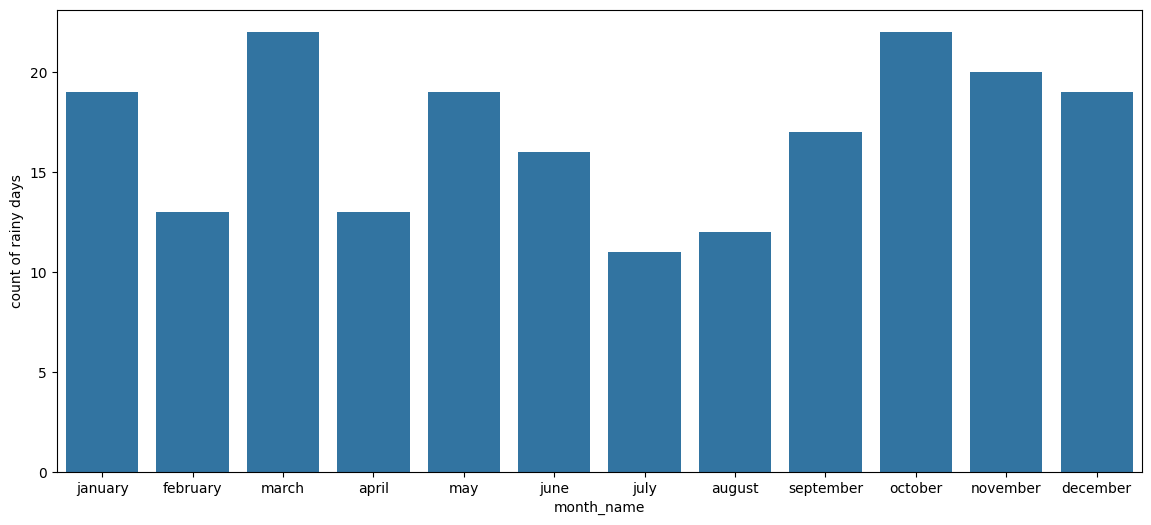

In [13]:
print("Descending order of count rainy days")
df_count_days_order = df_count_days.sort_values(by="count of rainy days", ascending=False)
print(df_count_days_order)
plt.figure(figsize=(14, 6))
sns.barplot(df_count_days, x="month_name", y="count of rainy days")
plt.show()

In [14]:
qty = df_count_days_order['count of rainy days'].sum()
print(f"Quantity of days with rain in Galicia: {qty}")
print(f'Percentage of days with rain in Galicia per year {round(qty/365, 2)}')

Quantity of days with rain in Galicia: 203
Percentage of days with rain in Galicia per year 0.56


The order of the number of rainy days per month is:  
**March = October > November > January = May = December > September > June > April = February > August > July**  
In Galicia, there are two months with the most rainy days: March and October. This is interesting because March doesn't even rank third in terms of average rainfall, but October has the highest average rainfall. On the other hand, the lowest rainfall occurs in July.  
This means that each month it rains at least more than 1/3 of the month (11 days), while at most it rains more than 2/3 of the month (22 days)

### Temperature  
When talking about climate, we always ask about the temperature; this is the most important indicator, and that's why it's included in this study. It's true that for Galicia, it may not vary that much, but it's always important to know which is the coldest and warmest city within Galicia. And with it, the temperature variation throughout the year.
#### Temperature about cities:
Here we're talking about temperature by city. Which is the coldest city? Which is the hottest? Why? Are there any cities that generally have a pleasant temperature?

In [15]:
prom_temp = df.groupby("city")["temp"].mean()
prom_temp

city
Coruña                    15.635030
Lugo                      12.610110
Ourense                   14.689866
Pontevedra                15.698965
Santiago de Compostela    13.793544
Vigo                      16.263520
Name: temp, dtype: float64

In [16]:
temp_list = prom_temp.sort_values(ascending=False).reset_index().rename(columns={0:"temp"})
print(temp_list)
fig = px.bar(temp_list, x="city", y="temp", 
                        title=f"         Average Temperature about city")
fig.update_layout(
        plot_bgcolor='rgba(0, 0, 0, 0)',
        paper_bgcolor='rgba(0, 0, 0, 0)',
        font=dict(color='white'),
        title_font=dict(color='white'),
        legend=dict(font=dict(color='white')),
        xaxis=dict(title='cities', color='white'),
        yaxis=dict(title='rainy days', color='white', gridcolor='rgba(255, 255, 255, 0.4)'),
        autosize=True,
        margin=dict(l=20, r=20, t=40, b=40)
    )
fig.show()

                     city       temp
0                    Vigo  16.263520
1              Pontevedra  15.698965
2                  Coruña  15.635030
3                 Ourense  14.689866
4  Santiago de Compostela  13.793544
5                    Lugo  12.610110


In [17]:
df.groupby("city")["temp"].max().sort_values(ascending=False).reset_index().rename(columns={0:"temp"})

,city,temp
0,Ourense,31.00
1,Lugo,27.80
2,Pontevedra,26.69
3,Santiago de Compostela,26.61
4,Vigo,26.03
5,Coruña,24.56


In [18]:
df.groupby("city")["temp"].min().sort_values(ascending=False).reset_index().rename(columns={0:"temp"})

,city,temp
0,Vigo,6.67
1,Coruña,6.42
2,Pontevedra,4.80
3,Santiago de Compostela,3.40
4,Ourense,1.04
5,Lugo,0.56


The distribution for **average temperature** per city:  
**Vigo > Pontevedra > Coruña > Ourense > Santiago de Compostela > Lugo**  
  
The distribution for **MAX temperature** per city:  
**Ourense > Lugo > Pontevedra > Santiago de Compostela > Vigo > Coruña**  
  
The distribution for **MIN temperature** per city:  
**Vigo > Coruña > Pontevedra > Santiago de Compostela > Ourense > Lugo**  
    
These statistics are very important because, if you look at the average temperature, the city with the highest value is Vigo (16.2°C). However, it is the second-to-last city when ordered by absolute maximum temperatures, while it has the highest value for absolute minimum temperatures. The important conclusion here is Vigo's low temperature variability, in addition to having a good climate, as it doesn't get too hot and it's not the coldest city either.  
  
So, we'll look for the standard deviation to consider the variability data.

In [19]:
df.groupby("city")["temp"].std().sort_values(ascending=False).reset_index().rename(columns={0:"temp"})

,city,temp
0,Ourense,6.100568
1,Lugo,5.378767
2,Pontevedra,4.707399
3,Santiago de Compostela,4.503681
4,Vigo,3.865587
5,Coruña,3.647277


The distribution for standard deviation per city:  
**Ourense > Lugo > Pontevedra > Santiago de Compostela > Vigo > Coruña**  
  
Once again, Vigo is second to last, which is very important, as the temperature in Vigo is comfortable and hovers around **16°C (+/-6.1°C)**. The other cities have the lowest temperatures and the greatest variation (with the exception of A Coruña).


#### Temperature about dates:
This section shows the monthly temperature distribution within the Galician region. This helps to understand the variability in temperature across the different seasons.

In [20]:
df_temp = df[["date", "temp", "month"]].groupby("date").mean().reset_index()
df_temp_mean = df_temp.groupby("month").mean().reset_index()
df_temp_mean['month_name'] = df_temp_mean['month'].map(meses)
print("Average temperature by Month")
print(df_temp_mean[["temp", "month_name"]].sort_values(by="temp", ascending=False))
print("----------------------------------------------------------------")

df_temp = df[["date", "temp", "month"]].groupby("date").max().reset_index()
df_temp_max = df_temp.groupby("month").max().reset_index()
df_temp_max['month_name'] = df_temp_max['month'].map(meses)
print("Max temperature by Month")
print(df_temp_max[["temp", "month_name"]].sort_values(by="temp", ascending=False))
print("----------------------------------------------------------------")


df_temp = df[["date", "temp", "month"]].groupby("date").min().reset_index()
df_temp_min = df_temp.groupby("month").min().reset_index()
df_temp_min['month_name'] = df_temp_min['month'].map(meses)
print("Min temperature by Month")
print(df_temp_min[["temp", "month_name"]].sort_values(by="temp", ascending=True))

df["month_name"] = df['month'].map(meses)
fig = px.box(df, x='month_name', y='temp',
                     title=f'        Monthly temperature distribution')
    
fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    font=dict(color='white'),
    title_font=dict(color='white'),
    legend=dict(font=dict(color='white')),
    xaxis=dict(title='Month', color='white'),
    yaxis=dict(title='Temperature (°C)', color='white', gridcolor='rgba(255, 255, 255, 0.4)'),
    autosize=True,
    margin=dict(l=20, r=20, t=40, b=40)
    )
fig.show()

Average temperature by Month
         temp month_name
7   21.340833     august
6   20.470430       july
5   19.021639       june
8   18.366111  september
9   17.081882    october
4   15.857366        may
3   14.538861      april
10  13.979389   november
2   11.694677      march
1   10.637235   february
0   10.153674    january
11   9.853817   december
----------------------------------------------------------------
Max temperature by Month
     temp month_name
7   31.00     august
6   28.34       july
5   27.12       june
9   24.56    october
8   24.41  september
4   22.39        may
2   21.53      march
10  21.25   november
3   20.84      april
1   19.16   february
11  18.51   december
0   17.52    january
----------------------------------------------------------------
Min temperature by Month
     temp month_name
11   0.56   december
0    1.11    january
1    2.23   february
2    2.30      march
10   5.47   november
3    6.52      april
4    6.73        may
9    9.27    october
8   

If you see, the three DataFrames (AVG, MAX and MIN) have the same info to the BoxPlot Graphs, but more explicit. In this graph we can see the estacionality in Temperature, with the highest in August and the lowest in December. The DataFrames confirm this data, because the MAX is 31°C in august and the MIN is 0.56°C in December. Well, the order of the data:  
  
**BY AVG: August > July > June > September > October > May > April > November > March > February > December > January**  
  
**BY MAX: August > July > June > October > September > May > March > Nomvember > April > February > December > January**  
  
**BY MIN: August > July > June > September > October > May > April > November > March > February > January > December**  

The results of this order are predictable, since if we look closely, the first three months and the last three months are always the same. This is easy to explain we're talking about summer and winter, the two extremes; the remaining months are the transitions between them. There are some interesting points here, such as that December, despite not being the coldest month on average, has the coldest peak, but they won't be described because they might be a bit obvious.

### Humidity  
We often focus on actual temperature and how it feels. There are many other aspects that make it interesting, such as its effect on plants, objects, and even ourselves. But in this case, we'll focus on the climate, as it directly affects our perception of temperature, or what's known as the **heat index**, the formation of weather phenomena, and ecosystems. Humidity can form clouds, disrupt the evaporation of sweat, and prevent the body from cooling.

Outdoors, relative humidity is typically between 30% and 50%, although ideally it should be between 40% and 60%.
#### Humidity about cities:
Knowing the humidity level in each city is extremely important, since the higher the humidity, the greater the difference between temperature and wind heat index. Therefore, a city with a lower relative humidity (%) will be more comfortable for people.

In [21]:
prom_hum = df.groupby("city")["hum"].mean()
prom_hum

city
Coruña                    84.885505
Lugo                      83.857491
Ourense                   75.427527
Pontevedra                79.224117
Santiago de Compostela    81.449452
Vigo                      77.014616
Name: hum, dtype: float64

In [22]:
hum_list = prom_hum.sort_values(ascending=False).reset_index().rename(columns={0:"hum"})
print(hum_list)
fig = px.bar(hum_list, x="city", y="hum", 
                        title=f"         Average Humidity about city")
fig.update_layout(
        plot_bgcolor='rgba(0, 0, 0, 0)',
        paper_bgcolor='rgba(0, 0, 0, 0)',
        font=dict(color='white'),
        title_font=dict(color='white'),
        legend=dict(font=dict(color='white')),
        xaxis=dict(title='cities', color='white'),
        yaxis=dict(title='rainy days', color='white', gridcolor='rgba(255, 255, 255, 0.4)'),
        autosize=True,
        margin=dict(l=20, r=20, t=40, b=40)
    )
fig.show()

                     city        hum
0                  Coruña  84.885505
1                    Lugo  83.857491
2  Santiago de Compostela  81.449452
3              Pontevedra  79.224117
4                    Vigo  77.014616
5                 Ourense  75.427527


In [23]:
df.groupby("city")["hum"].max().sort_values(ascending=False).reset_index().rename(columns={0:"hum"})

,city,hum
0,Coruña,100.0
1,Lugo,100.0
2,Ourense,100.0
3,Pontevedra,100.0
4,Vigo,100.0
5,Santiago de Compostela,99.0


In [24]:
df.groupby("city")["hum"].min().sort_values(ascending=False).reset_index().rename(columns={0:"hum"})

,city,hum
0,Lugo,48.0
1,Vigo,47.0
2,Pontevedra,42.0
3,Ourense,41.0
4,Santiago de Compostela,39.0
5,Coruña,30.0


When viewing the graph and DataFrames written before we can see that:   
  
The distribution for **average humidity** per city:  
**Coruña > Lugo > Santiago de Compostela > Pontevedra > Vigo > Ourense**  
  
The distribution for **MAX humidity** per city:  
**Coruña = Lugo = Pontevedra = Vigo = Coruña > Santiago de Compostela**  
  
The distribution for **MIN humidity** per city:  
**Lugo > Vigo > Pontevedra > Ourense > Santiago de Compostela > Coruña**  
  
The city with the highest average humidity is A Coruña, which is also the city with the lowest absolute humidity among Galician cities. This is important because, despite being a very humid city, likely due to the sea component, it can also be very dry at certain times of the year, making it the city with the greatest humidity variability in Galicia. On the other hand, the maximum doesn't really tell much, since practically all cities reach 100% humidity at some point. The most notable conclusion is that Galicia is a very humid territory.  

Finally, regarding the cities with the lowest average humidity, Vigo is again the second-to-last. It's also the second-to-last in terms of minimum humidity, which is key because it again has less variation. This city tends to stray from the extremes in most cases.


#### Humidity about dates:
Humidity will tell us which month has the least or most humidity. Being in a fairly humid area like Galicia, it will be difficult to observe, as there are many coastal cities, and the variation may not be significant.

In [25]:
df_hum = df[["date", "hum", "month"]].groupby("date").mean().reset_index()
df_hum_mean = df_hum.groupby("month").mean().reset_index()
df_hum_mean['month_name'] = df_hum_mean['month'].map(meses)
print("Average humidity by Month")
print(df_hum_mean[["hum", "month_name"]].sort_values(by="hum", ascending=False))
print("----------------------------------------------------------------")

df_hum = df[["date", "hum", "month"]].groupby("date").max().reset_index()
df_hum_max = df_hum.groupby("month").max().reset_index()
df_hum_max['month_name'] = df_hum_max['month'].map(meses)
print("Max humidity by Month")
print(df_hum_max[["hum", "month_name"]].sort_values(by="hum", ascending=False))
print("----------------------------------------------------------------")


df_hum = df[["date", "hum", "month"]].groupby("date").min().reset_index()
df_hum_min = df_hum.groupby("month").min().reset_index()
df_hum_min['month_name'] = df_hum_min['month'].map(meses)
print("Min humidity by Month")
print(df_hum_min[["hum", "month_name"]].sort_values(by="hum", ascending=True))

Average humidity by Month
          hum month_name
11  87.220430   december
9   86.233871    october
10  85.802778   november
0   84.342294    january
8   80.522222  september
1   79.900000   february
5   79.344444       june
2   77.487455      march
6   76.376344       july
7   76.365591     august
4   76.231183        may
3   73.366667      april
----------------------------------------------------------------
Max humidity by Month
      hum month_name
0   100.0    january
1   100.0   february
2   100.0      march
3   100.0      april
4   100.0        may
5   100.0       june
6   100.0       july
7   100.0     august
8   100.0  september
9   100.0    october
10  100.0   november
11  100.0   december
----------------------------------------------------------------
Min humidity by Month
     hum month_name
2   30.0      march
9   40.0    october
3   41.0      april
4   42.0        may
1   43.0   february
8   45.0  september
7   46.0     august
10  46.0   november
11  48.0   december
5 

In [26]:
df["month_name"] = df['month'].map(meses)
fig = px.box(df, x='month_name', y='hum',
                     title=f'        Monthly temperature distribution')
    
fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    font=dict(color='white'),
    title_font=dict(color='white'),
    legend=dict(font=dict(color='white')),
    xaxis=dict(title='Month', color='white'),
    yaxis=dict(title='Humidity (%)', color='white', gridcolor='rgba(255, 255, 255, 0.4)'),
    autosize=True,
    margin=dict(l=20, r=20, t=40, b=40)
    )
fig.show()

This variable is particularly difficult to identify because, as it is located in a very humid area, it also lacks significant variability. The data is sorted by AVG/MAX/MIN as follows

**BY AVG: December > October > November > January > September > February > June > March > July > August > May > April**

**BY MAX: 100% ALL**

**BY MIN: January > July > June > December > November > August > September > February > May > April > October > March**
  
It is true that the autumn and winter months tend to have higher average humidity levels, but while the lowest levels are in April, just as the season is changing, this phenomenon is similar to the amount of rainfall and number of rainy days in this same month, which also has one of the lowest levels. The data frames confirmed this data, as all the highs are at 100% humidity, and the low is in March (30%), which is an anomalous value within its distribution. 

## Precipitation vs Temperature vs Humidity

In [27]:
df3 = df.drop(["month", "month_name", "city"], axis=1)
df3 = df3.groupby("date").mean().reset_index()

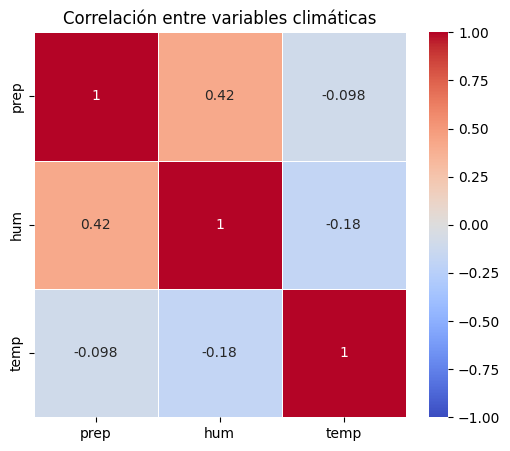

In [28]:
# Calcular matriz de correlación
corr = df3[['prep', 'hum', 'temp']].corr()

# Crear el heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlación entre variables climáticas')
plt.show()

If you look at this graph, we can only consider the relationship between humidity and precipitation to be important, since the other two are very close to zero with precipitation. This means that temperature is not linked to either; that is, it can be very hot and rain, or very cold and rain, or the opposite, since they are basically independent variables. On the other hand, the strongest relationship is between humidity and precipitation, reaching over 0.4 on the Pearson coefficient, something worth taking into account, so that will be the next step to consider.  
### Precipitation vs Humidity

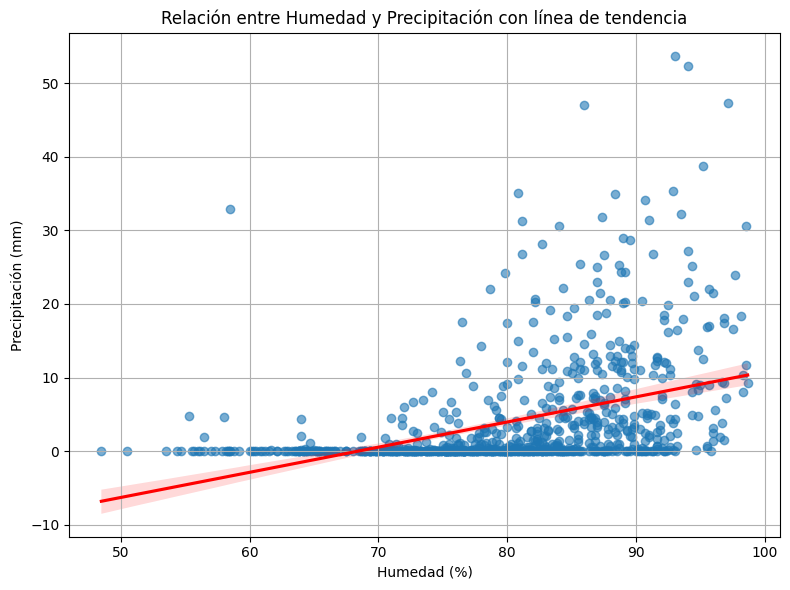

In [29]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df3, x='hum', y='prep', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Relación entre Humedad y Precipitación con línea de tendencia')
plt.xlabel('Humedad (%)')
plt.ylabel('Precipitación (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()

It can be observed that when humidity is low, the probability of precipitation is practically zero. This makes sense from a physical perspective, since rain requires a minimum amount of water vapor in the air for clouds capable of condensing and precipitating to form.  

However, high humidity does not guarantee the occurrence of rain, which explains why the relationship between the two variables is not strong across the entire range. Still, there is a clear connection: the presence of clouds, which is usually associated with high humidity values, increases the probability of rain. Therefore, although the relationship is neither linear nor deterministic, it can be stated that there is a partial dependence between humidity and precipitation.

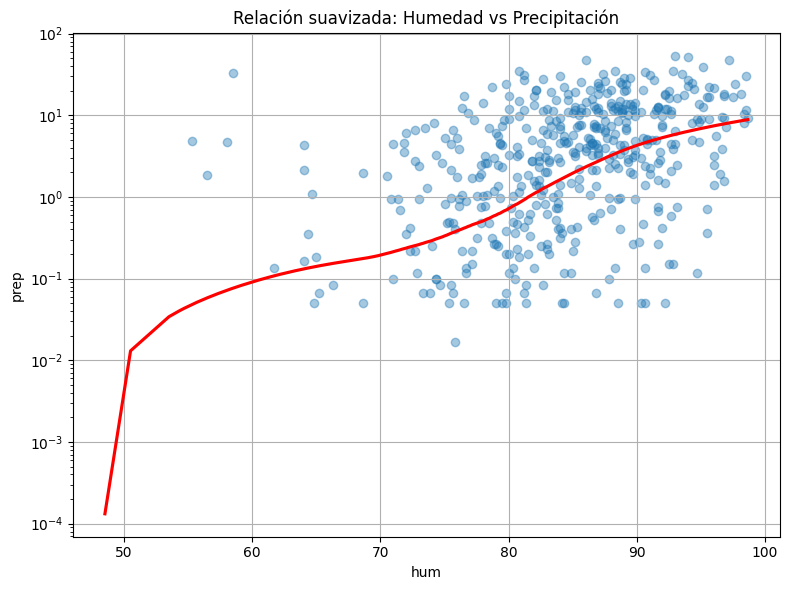

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df3, x='hum', y='prep', 
            scatter_kws={'alpha': 0.4}, 
            line_kws={'color': 'red'}, 
            lowess=True)
plt.yscale('log')
plt.title('Relación suavizada: Humedad vs Precipitación')
plt.grid(True)
plt.tight_layout()
plt.show()


This graph uses the logarithm of the variable Precipitation. It's worth noting that the logarithm of 0 is undefined, so days without rain (0 L/m²) are NOT PRESENTED IN THE GRAPH.
This is extremely useful, as it allows us to observe that most precipitation values occur after a 70% humidity level. Therefore, we can conclude that high humidity and rainfall are related. This likely stems from the need for clouds for the growth of both variables, both for the increase in humidity and for the presence of rain.

## Conclusions
- **Santiago de Compostela** is the city with the highest average rainfall and the highest number of rainy days.
- Month with the most rain: **October**.
- Months usually have between 11 and 22 rainy days, that is, at least one third (1/3) of the month it rains and at most two thirds (2/3).  
- Galicia have 203 days with rain per year, this is the 56% of the year.
- Cities by average temperature: **Vigo > Pontevedra > Coruña > Ourense > Santiago de Compostela > Lugo**.
- City with the highest peak temperature Temperature: **Ourense**.
- City with the lowest peak temperature: **Lugo**.
- Months of the year by average temperature: **August > July > June > September > October > May > April > November > March > February > December > January**.
- Month with the highest peak temperature: **August**.
- Month with the lowest peak temperature: **December**.  
- **Vigo** is the city with the most stable climate (smallest range of variation).
- **Ourense** is the city with the most extreme climate (greatest range of variation).  

- The wettest city in Galicia is **A Coruña**, followed by **Lugo**. However, A Coruña has the greatest range of variation, and Lugo the least.  
- The wettest months are Winter and Autumn, with **December** being the wettest.
- Precipitation and humidity have a Pearson coefficient of 0.42.

## Share  
To share these findings and metrics, a Streamlit page was created: [Morriña en Galicia (Galizia Weather)](https://galiziaweather.streamlit.app)  
Where the report for all of Galicia can be divided into different graphs and explanations, covering each variable separately and with small general observations that are repeated throughout the variables. A comprehensive section is needed to add to this, where one variable can be related to another and their relationship seen.
One of the most important findings is that, based on climate, the best city to live in is Vigo, as it has a smaller range of temperature variation, is one of the cities with the fewest rainy days, and is not one of the most humid cities. This latter aspect is a problem throughout Galicia, as all cities are humid.

## Next Steps  
- It would be very interesting to see some of these cities compared to others with a different distribution, since, since these are all in Galicia, their behavior is somewhat "similar." While comparing them with Madrid, which is more continental, or Barcelona, ​​which faces the coast but is a sea, not an ocean, the differences will surely be greater. So, for a next step, adding these two cities would be very valuable.
- On the other hand, when we're talking about climate, it's impossible not to think about creating a predictive model, so something of great interest for this would be to generate a model based on the collected climate data.